In [23]:
import warnings
import numpy as np
import numpy.linalg as la
import math as mt
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import sympy as sp
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# PUNTO 1

Escriba un polinomio $p(x)$ tal que $|sinc(x) − p(x)| ≤ 10^{-10}$ para $−0.2 ≤ x ≤ 0.2$, donde:
$$
f(x)= \left\{ \begin{array}{lcc}
             \frac{sin(x)}x &   si  &  x\neq 0 \\
             \\ 1 &  si  & x =  0
             \end{array}
   \right.
$$
es la función "$sinc$" (usada en procesamiento de señales, etc). Muestre ademas que su polinomio p cumple la condición: $|sinc(x) − p(x)| ≤ 10^-10$ para $x ∈ [−0.2, 0.2]$, grafique los errores teoricos y reales.

In [24]:
x = sp.symbols("x")  # creamos la variable x
sinc = sp.Piecewise((sp.sin(x)/x, x!=0), 
                    (1, True))  # asignamos la funcion

x0 = 0   # punto de expansion
n = 6    # orden de polinomio

In [25]:
p = sp.series(expr = sinc, x=x , x0=x0, n=n)   # genera la serie de taylor
display(Math(sp.latex(p)))   # muestra la serie en formato latex


<IPython.core.display.Math object>

In [26]:
# Se genera una lista de polinomios de Taylor de sinc(x)
p = [sp.series(expr = sinc, x=x , x0=0, n=ni).removeO() for ni in range(2,10)]

# Se genera un arreglo con los grados de los polinomios de Taylor generados
pol_deg = np.arange(1,(len(p)+1))

# Se evalúa la función sinc(x) en x=0.1
f_eval = sinc.subs(x, 0.1).evalf()

# Se evalúa cada uno de los polinomios de Taylor en x=0.1
p_eval = [p_n.subs(x, 0.1).evalf() for p_n in p]

# Se genera una lista con los errores reales para cada grado de polinomio generado
error_real = [np.abs(float(f_eval - p_eval[i])) for i in range(len(pol_deg))]

# Se genera una lista con los errores estimados para cada grado de polinomio generado
error_estimado = [((0.1)**(n+1))/(mt.factorial(n+1)) for n in pol_deg]

In [27]:
found_n = False
for i in range(len(error_real)):
    if error_real[i] <= 10**-10:
        print(f"El polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: \nPolinomio de orden n = {i+1}")
        found_n = True
        print(f"Valor es: {error_real[i]}")
        break
if not found_n:
    print("No hay polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2. Intente con más polinomios.")

print("\nErrores estimados: ")
for i in range(len(error_estimado)):
    print(f"n = {i+1} es: {error_estimado[i]}")

print("\nErrores reales: ")
for i in range(len(error_real)):
    print(f"n = {i+1} es: {error_real[i]}")

El polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: 
Polinomio de orden n = 6
Valor es: 2.7644553313166398e-14

Errores estimados: 
n = 1 es: 0.005000000000000001
n = 2 es: 0.00016666666666666672
n = 3 es: 4.166666666666668e-06
n = 4 es: 8.333333333333335e-08
n = 5 es: 1.3888888888888894e-09
n = 6 es: 1.984126984126985e-11
n = 7 es: 2.4801587301587314e-13
n = 8 es: 2.7557319223985903e-15

Errores reales: 
n = 1 es: 0.0016658335317184525
n = 2 es: 8.331349482526562e-07
n = 3 es: 8.331349482526562e-07
n = 4 es: 1.9838508613645445e-10
n = 5 es: 1.9838508613645445e-10
n = 6 es: 2.7644553313166398e-14
n = 7 es: 2.7644553313166398e-14
n = 8 es: 1.1102230246251565e-16


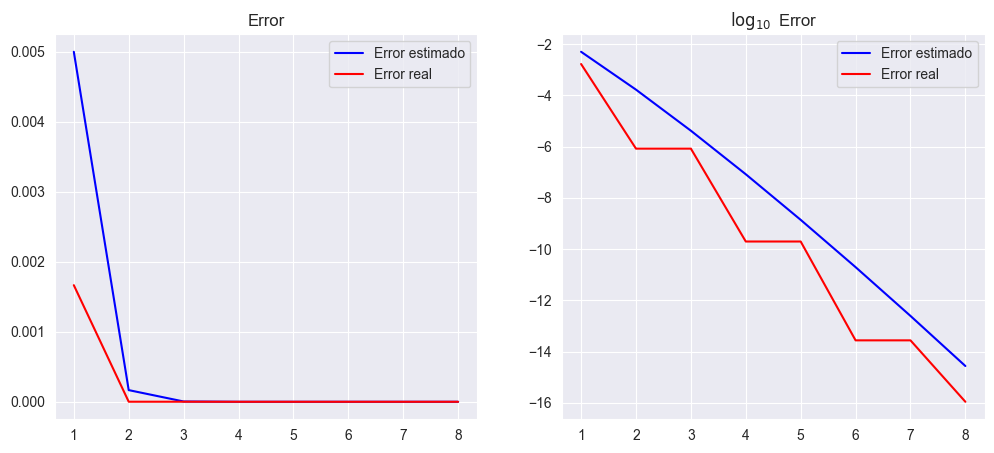

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(pol_deg,error_estimado,color='b')
ax1.plot(pol_deg,error_real, color ='r')
ax1.set_title('Error')
ax1.legend(['Error estimado', 'Error real'], prop={'size':10})

ax2.plot(pol_deg,np.log10(error_estimado),color='b')
ax2.plot(pol_deg,np.log10(error_real), color = 'r')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error estimado', 'Error real'], prop={'size':10});

# PUNTO 2
Halle las fórmulas de diferencias progresivas, regresivas y centrales para cualquier $f ∈ C4[a, b]$ tal que para $x_{0} ∈ (a,b)$ se tenga $O(h^3$). Luego, considere $f(x) = xln(x)$ y calcule $f′(1)$ para distintos valores de $h$, grafique los errores e indique qué valor de $h$ minimiza el error.

Por Taylor, nuestra función debe ser derivable hasta orden 4:

$$f(x)=f(x_0)+f^{'}(x_0)(x-x_0)+f^{''}(x)\frac{(x-x_0)^{2}}{2!}+f^{'''}(x)\frac{(x-x_0)^{3}}{3!}+f^{''''}(c)\frac{(x-x_0)^{4}}{4!}$$

Haciendo uso del Teorema de Taylor tenemos las siguientes igualdades para $x=x_0+kh$, con $k=2,3,4$ 
$$
\\f(x_{0}+2h)=f{\left(x_{0} \right)} + 2 h f'(x_{0}) + 2 h^{2} f''(x_{0}) + \frac{4 h^{3}}{3}f'''(x_{0}) + O\left(h^{4}\right)
\\f(x_{0}+3h)=f{\left(x_{0} \right)} + 3 h f'(x_{0}) + \frac{9 h^{2}}{2}f''(x_{0}) + \frac{9 h^{3}}{2}f'''(x_{0}) + O\left(h^{4}\right)
\\f(x_{0}+h)=f{\left(x_{0} \right)} + 4 h f'(x_{0}) + 8 h^{2}f''(x_{0}) + \frac{32 h^{3}}{3} f'''(x_{0}) + O\left(h^{4}\right)$$

Con lo anterior nos interesa encontrar una combinación lineal tal los terminos $f''$ y $f'''$ desaparezcan y que además se garantice que $f'$ se mantenga. Es decir que nos interesan encontrar constantes $a,b,c$ tales que se obtenga la siguiente combinación lineal
$$(2a + 2b  + \frac{4}{3}c ) f'(x_{0}) +  (3a + \frac{9}{2} b+ \frac{9}{2}c ) f''(x_{0})  +  (4a  + 8b + \frac{32}{3}c  )f'''(x_{0}) = f'(x_0)$$

In [29]:
# Se define la matriz de coeficientes "coeff"
coeff = np.array([
    [2, 3, 4],
    [2, 9/2, 8], 
    [4/3, 9/2, 32/3]
])

# Se define el vector de términos constantes "constants"
constants = np.array([1,0,0])

# Se resuelve el sistema de ecuaciones lineales representado por la matriz de coeficientes "coeff" y el vector de términos constantes "constants" utilizando la función "solve" del módulo "linalg" de NumPy.
# Los valores de la matriz de soluciones se asignan a las variables "a", "b" y "c", respectivamente.
a, b, c = la.solve(coeff,constants)

In [30]:
x,x0,h = sp.symbols('x,x0,h')
f = parse_expr('f(x)')
n=4

In [31]:
f1 =f.subs(x,x0+2*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+2*h)
display(f1)
f2 =f.subs(x,x0+3*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+3*h)
display(f2)
f3 =f.subs(x,x0+4*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+4*h)
display(f3)

f(2*h + x0) - f(x0) - 2*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - 2*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0) - 4*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x0)/3 + O(h**4)

f(3*h + x0) - f(x0) - 3*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - 9*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0)/2 - 9*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x0)/2 + O(h**4)

f(4*h + x0) - f(x0) - 4*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - 8*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0) - 32*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x0)/3 + O(h**4)

In [32]:
# Define una expresión simbólica F0 como una combinación lineal de las expresiones simbólicas f1, f2 y f3, utilizando los símbolos a, b y c.
F0 = a*f1 + b*f2 + c*f3

# Simplifica la expresión simbólica F0 utilizando la función nsimplify() del módulo sympy.
# Se le proporciona una tolerancia de 10^-4 para simplificar la expresion y se indica que se prefiere una forma racional.
F1 = sp.nsimplify(F0, tolerance=10**-4, rational=True)

# Asigna la expresión simplificada a la variable F1.

In [33]:
display(Math(sp.latex(F1).replace('\\left. \\frac{d}{d \\xi_{1}} f{\\left(\\xi_{1} \\right)} \\right|_{\\substack{ \\xi_{1}=x_{0} }}',"f'(x_{0})")+'=0'))

<IPython.core.display.Math object>

In [34]:
# Definimos la variable simbólica x y la función f
x = sp.Symbol('x')
f = x * sp.ln(x)

# Definimos el punto de evaluación x0 y una lista de valores de h
x0 = 1  
h_values = [i for i in range(-10,0)]

# Creamos otra lista de valores de h, elevados a potencias negativas de 10
# para que los valores sean cercanos a cero
h_pot = [10**i for i in range(-10,0)]
print(f"Valores de h: \n {h_pot}")

# Calculamos las aproximaciones progresivas y regresivas de la derivada
# utilizando la fórmula de tres puntos
aprox_prog = [float(((3*f.subs(x, x0+4*h) - (32/3)*f.subs(x, x0 + 3*h) + 
                12*f.subs(x, x0+2*h) - (13/3)*f.subs(x, x0)) / (4*h)).evalf()) for h in h_pot]  # formula progreiva

aprox_reg = [float(((-3*f.subs(x, x0-4*h) + (32/3)*f.subs(x, x0 - 3*h) 
                - 12*f.subs(x, x0-2*h) + (13/3)*f.subs(x, x0)) / (4*h)).evalf()) for h in h_pot] # formula regresiva

# Imprimimos las aproximaciones progresivas y regresivas para cada valor de h
print("Aproximaciones progresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->   aproximacion: {aprox_prog[i]}")

print("\nAproximaciones regresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->    aproximacion: {aprox_reg[i]}")

Valores de h: 
 [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
Aproximaciones progresivas: 
h = 1e-10  ----->   aproximacion: 1.0000000827403719
h = 1e-09  ----->   aproximacion: 0.9999998421920492
h = 1e-08  ----->   aproximacion: 1.0000000179773614
h = 1e-07  ----->   aproximacion: 0.9999999981783847
h = 1e-06  ----->   aproximacion: 1.0000000001582823
h = 1e-05  ----->   aproximacion: 0.9999999999824994
h = 0.0001  ----->   aproximacion: 1.0000000000018892
h = 0.001  ----->   aproximacion: 1.0000000019895414
h = 0.01  ----->   aproximacion: 1.0000018962427373
h = 0.1  ----->   aproximacion: 1.0012400275654099

Aproximaciones regresivas: 
h = 1e-10  ----->    aproximacion: 1.0000000827403699
h = 1e-09  ----->    aproximacion: 1.0000000919922305
h = 1e-08  ----->    aproximacion: 0.9999999846706713
h = 1e-07  ----->    aproximacion: 1.0000000015090518
h = 1e-06  ----->    aproximacion: 0.999999999908483
h = 1e-05  ----->    aproximacion: 1.000000000015802
h = 0.0

### errores

hallamos el error de las progresivas y regresivas con: 

$error = {|valor_{real} - errores_{realtivos}|}$

In [35]:
f_diff = sp.diff(f, x)  # se deriva f
df_real = float(f_diff.subs(x, x0).evalf())   # valor real que seria la derivada de f evaluada en 1
print(f"la derivada de la funcion es {f_diff}\n el valor real o f'(1) es: {df_real}")

la derivada de la funcion es log(x) + 1
 el valor real o f'(1) es: 1.0


In [36]:
error_prog = [(np.abs(df_real-df_prog)) for df_prog in aprox_prog]   # lista de errores progresivas
print(f"errores progresivas: \n{error_prog}")

errores progresivas: 
[8.274037188726879e-08, 1.578079508179897e-07, 1.7977361377319312e-08, 1.8216153030436999e-09, 1.5828227617475932e-10, 1.7500556559468805e-11, 1.8891554987021664e-12, 1.989541420499563e-09, 1.896242737275955e-06, 0.0012400275654098625]


In [37]:
error_reg = [(np.abs(df_real-df_reg)) for df_reg in aprox_reg]  # lista de errores regresivas
print(f"errores regresivas:\n{error_reg}")

errores regresivas:
[8.274036988886735e-08, 9.199223049982663e-08, 1.532932869530157e-08, 1.5090517724303254e-09, 9.15170161874812e-11, 1.5802026354094778e-11, 2.1116441928370477e-12, 2.0108411602492993e-09, 2.112568856516006e-06, 0.0037717483683460395]


In [38]:
# "argmin" devuelve el valor minimo de la lista
h_min_prog = h_pot[np.argmin([error_prog])]   # encuentra el valor de h correspondiente al error mínimo para las derivadas progresivas
h_min_reg = h_pot[np.argmin([error_reg])]    # encuentra el valor de h correspondiente al error mínimo para las derivadas regresivas
error_min_prog = error_prog[h_pot.index(h_min_prog)]    # encuentra el error mínimo correspondiente al valor de h mínimo para las derivadas progresivas
error_min_reg = error_reg[h_pot.index(h_min_reg)]    # encuentra el error mínimo correspondiente al valor de h mínimo para las derivadas regresivas

# imprime los valores de h y error mínimos para cada método de aproximación de derivadas numéricas
print(f"h donde minimiza el error es (progresivas): {h_min_prog}, Error mínimo: {error_min_prog}")
print(f"h donde minimiza el error es (regresivas): {h_min_reg}, Error mínimo: {error_min_reg}")

h donde minimiza el error es (progresivas): 0.0001, Error mínimo: 1.8891554987021664e-12
h donde minimiza el error es (regresivas): 0.0001, Error mínimo: 2.1116441928370477e-12


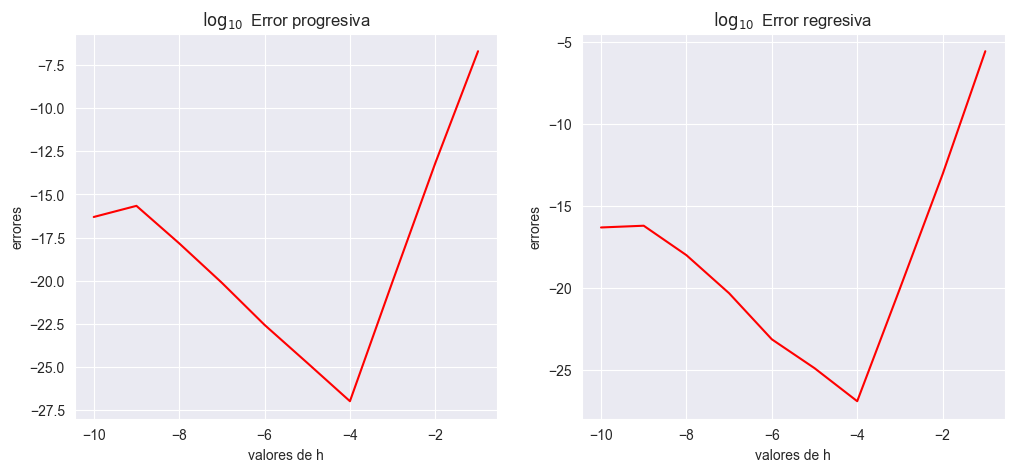

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(h_values,np.log(error_prog),color='r')
ax1.set_xlabel("valores de h")
ax1.set_ylabel("errores")
ax1.set_title('$\log_{10}$ Error progresiva');

ax2.plot(h_values,np.log(error_reg),color='r')
ax2.set_xlabel("valores de h")
ax2.set_ylabel("errores")
ax2.set_title('$\log_{10}$ Error regresiva');

# PUNTO 3
Considere la función: $f(x) = xsin(x)$ grafique en un solo lienzo a $f$ y los polinomios de Taylor
de grado $n = 1,2,...,6$ para: $x_0∈(−5π,5π)$.

In [40]:
x = sp.symbols("x")  # declaramos una variable
x_sinx = x*sp.sin(x)   # definimos la función

x0 = 0
n = 6

In [41]:
p = sp.series(expr= x_sinx, x=x, x0=x0, n=n)  # genera la serie de taylor de f
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [42]:
max_n = 10
p = [sp.series(expr = x_sinx, x0=x0, n=n).removeO() for n in range(4,max_n)]  
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [43]:
sns.set_style('whitegrid')
cmap = sns.color_palette('tab10', n_pol)

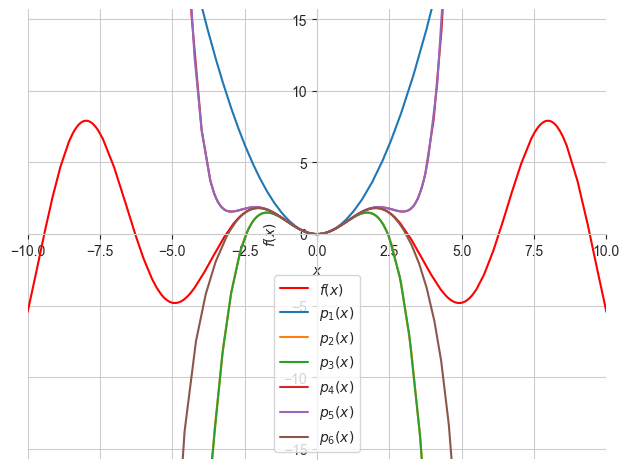

In [44]:
fig = pls.plot(x_sinx,xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()